In [1]:
import sys

sys.path.append("../")

import torch

from torchemlp.reps import V
from torchemlp.groups import Z, S, SO, O, O13, SO13

In [2]:
G = Z(4)
rep = V(G)

v = torch.randn(rep.size)
g = G.sample()

print(f"𝜌(g) =\n{rep.rho(g)}")
print(f"v = {v}")
print(f"𝜌(g)v = {rep.rho(g) @ v:}")

𝜌(g) =
tensor([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]])
v = tensor([0.8108, 0.4789, 0.5152, 0.0348])
𝜌(g)v = tensor([0.5152, 0.0348, 0.8108, 0.4789])


In [3]:
print(f"V(Z(5))'s Equivariant Basis: {V(Z(5)).equivariant_basis().dense}")

V(Z(5))'s Equivariant Basis: tensor([[0.4472],
        [0.4472],
        [0.4472],
        [0.4472],
        [0.4472]])


In [4]:
G = Z(6)
repin = V(G)
repout = V(G)

conv_basis = (repin >> repout).equivariant_basis().dense

In [5]:
conv_basis[:, 0]

tensor([ 0.3938, -0.0120, -0.0521, -0.0372,  0.0821,  0.0241,  0.0241,  0.3938,
        -0.0120, -0.0521, -0.0372,  0.0821,  0.0821,  0.0241,  0.3938, -0.0120,
        -0.0521, -0.0372, -0.0372,  0.0821,  0.0241,  0.3938, -0.0120, -0.0521,
        -0.0521, -0.0372,  0.0821,  0.0241,  0.3938, -0.0120, -0.0120, -0.0521,
        -0.0372,  0.0821,  0.0241,  0.3938])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def vis_basis(basis, shape, cluster=True):
    Q = basis @ np.eye(basis.shape[-1])  # convert to a dense matrix if necessary
    v = np.random.randn(Q.shape[0])  # sample random vector
    v = Q @ (Q.T @ v)  # project onto equivariant subspace
    if cluster:  # cluster nearby values for better color separation in plot
        v = KMeans(n_clusters=Q.shape[-1]).fit(v.reshape(-1, 1)).labels_
    plt.imshow(v.reshape(shape))
    plt.axis("off")


def vis(repin, repout, cluster=True):
    Q = (repin >> repout).equivariant_basis().dense  # compute the equivariant basis
    vis_basis(Q, (repout.size, repin.size), cluster)  # visualize it

/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


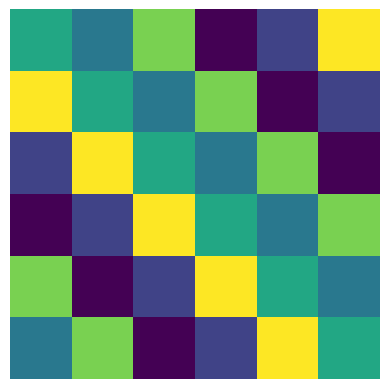

In [7]:
vis_basis(conv_basis, (repin.size, repout.size))

/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


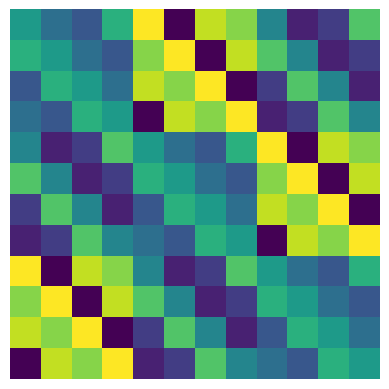

In [8]:
G = Z(3) * Z(4)
repin = V(G)
repout = V(G)
vis(repin, repout)

/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


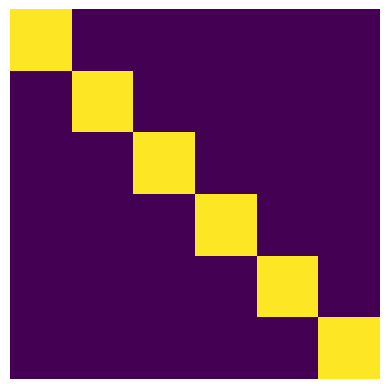

In [9]:
repin = V(S(6))
repout = V(S(6))
vis(repin, repout)

Basis matrix of shape torch.Size([1296, 15])


/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


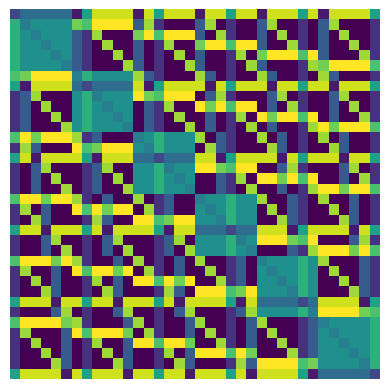

In [10]:
repin = V(S(6)) ** 2
repout = V(S(6)) ** 2
vis(repin, repout)
print(f"Basis matrix of shape {(repin>>repout).equivariant_basis().shape}")

Basis matrix of shape torch.Size([27, 1])


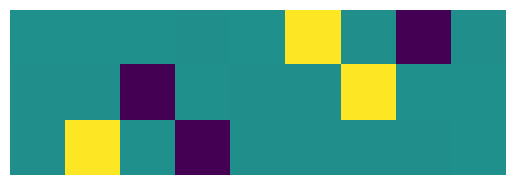

In [11]:
W = V(SO(3))
repin = W**2
repout = W
Q = (repin >> repout).equivariant_basis().dense
print(f"Basis matrix of shape {Q.shape}")
vis(repin, repout, cluster=False)

In [12]:
from torchemlp.reps import sparsify_basis

print(sparsify_basis(Q).reshape(3, 3, 3))

Sparsifying basis: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2567.74it/s]

tensor([[[ 0.,  0.,  0.],
         [ 0.,  0., -1.],
         [ 0.,  1.,  0.]],

        [[ 0.,  0.,  1.],
         [ 0.,  0.,  0.],
         [-1.,  0.,  0.]],

        [[ 0., -1.,  0.],
         [ 1.,  0.,  0.],
         [ 0.,  0.,  0.]]], grad_fn=<ViewBackward0>)


/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


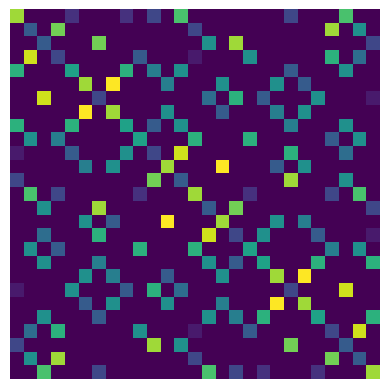

In [13]:
vis(W**3, W**3)

Krylov Solving for Equivariant Subspace r<=160: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.61it/s]
/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


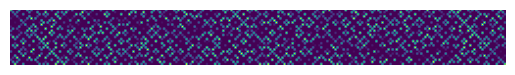

In [14]:
repin = W**5
repout = W**3
Q = (repin >> repout).equivariant_basis().dense.detach().numpy()
vis_basis(Q, (repout.size, repin.size))

/home/rytse/mambaforge/envs/l2e10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


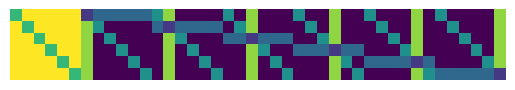

In [15]:
W = V(S(6))
repin = W + W**2  # (one set feature and one edge feature)
repout = W  # (one set feature)

rep_map = repin >> repout
Q = rep_map.equivariant_basis().dense.detach().numpy()

vis_basis(Q, (repout.size, repin.size))

In [16]:
W = V(S(6))
repin = 100 * W**0 + 100 * W + 20 * W**2
repout = repin
rep_map = repin >> repout
print(f"{rep_map}, of size {rep_map.size}")

# Don't densify, you don't have enough memory!
Q = rep_map.equivariant_basis()
print(f"Basis matrix of shape {Q.shape}")

10000V⁰+20000V+14000V²+4000V³+400V⁴, of size 2016400
Basis matrix of shape (2016400, 84000)


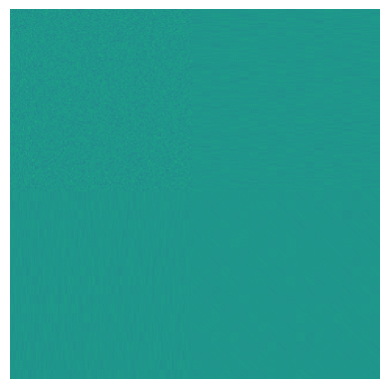

In [17]:
# Don't densify, you don't have enough memory!
P = rep_map.equivariant_projector()
v = torch.randn(P.shape[-1])
v = P @ v
plt.imshow(v.reshape(repout.size, repin.size))
plt.axis("off");